In [110]:
import pandas as pd

In [112]:
# Load your CSV
df = pd.read_csv("/Users/yaseminerdemli/Documents/BA Courses/Dissertation/Project/Data/clustering_v2.csv")

In [114]:
df

,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,numberofStarbucks,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,Cluster_Grouped
0,Massachusetts,1001,MA,Agawam,0.347766,0.042573,0.459649,0.084415,89728.0,0.0,...,-0.450794,-0.009620,0.306444,-0.166754,0.457133,0.166091,0.193811,-0.103435,1,0
1,Massachusetts,1002,MA,Amherst,0.710799,0.076882,0.504244,0.238057,114866.0,0.0,...,-0.619848,-0.259594,2.357738,-1.215284,1.046059,0.963352,-0.578148,-0.890076,4,2
2,Massachusetts,1005,MA,Barre,0.377865,0.038710,0.409749,0.110557,108457.0,0.0,...,-0.060724,-0.250551,0.420306,0.024631,0.132128,0.311824,-0.013040,-0.043216,1,0
3,Massachusetts,1007,MA,Belchertown,0.465608,0.035925,0.527476,0.049720,110360.0,0.0,...,-0.399744,-0.204162,0.628142,-0.055601,0.387392,0.209973,-0.069183,-0.152908,4,2
4,Massachusetts,1008,MA,Blandford,0.358053,0.015517,0.425569,0.046595,97083.0,0.0,...,-0.162593,-0.050984,-0.215100,-0.035100,0.190708,0.153614,-0.029619,0.118200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,Alaska,99901,AK,Ketchikan,0.254405,0.055489,0.307160,0.088283,91797.0,1.0,...,0.001711,0.554882,0.147346,0.214573,-0.255615,-0.579242,0.068055,-0.040634,1,0
28224,Alaska,99919,AK,Thorne Bay,0.247216,0.058333,0.331858,0.150094,58000.0,0.0,...,0.250411,-0.140392,0.206977,-0.069980,0.009081,0.200998,-0.144779,-0.022457,3,0
28225,Alaska,99921,AK,Craig,0.246305,0.064574,0.309684,0.172878,67000.0,0.0,...,0.248738,-0.189039,0.349024,-0.000823,-0.007376,0.235272,-0.098544,-0.041555,3,0
28226,Alaska,99925,AK,Klawock,0.147265,0.127660,0.261641,0.180991,80139.0,0.0,...,0.418295,-0.508684,1.177776,0.499400,0.002197,-0.618311,-0.055208,0.015778,7,2


In [116]:
df.groupby('Cluster_Grouped').count()

,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,numberofStarbucks,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
Cluster_Grouped,,,,,,,,,,,,,,,,,,,,,
0,18540,18540,18540,18540,18540,18540,18540,18540,18540,18540,...,18540,18540,18540,18540,18540,18540,18540,18540,18540,18540
1,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,...,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497
2,7191,7191,7191,7191,7191,7191,7191,7191,7191,7191,...,7191,7191,7191,7191,7191,7191,7191,7191,7191,7191


In [118]:
# Define the mapping: cluster -> tier label
tier_map = {
    0: "Rest",
    1: "1st Tier",
    2: "2nd Tier"
}

# Apply the mapping to a new column
df["TierLabel"] = df["Cluster_Grouped"].map(tier_map)


In [46]:
df_filtered = df[df["Cluster"].isin([1, 2])].copy()


In [58]:
df_filtered = df_filtered.drop(columns=['GroupID','PredictedScore'])

In [60]:
df_filtered

,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,% Affluence,Median Income,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,RankLabel
0,Massachusetts,1001,MA,Agawam,0.347766,0.042573,0.459649,0.084415,0.370799,89728.0,...,0.276450,-0.826701,1.170556,-0.799727,0.521682,0.139764,0.048640,-0.113707,2,1
1,Massachusetts,1002,MA,Amherst,0.710799,0.076882,0.504244,0.238057,0.559821,114866.0,...,-0.336562,-1.574728,2.762486,0.493429,-0.330092,1.538352,0.529253,-0.050861,2,1
2,Massachusetts,1005,MA,Barre,0.377865,0.038710,0.409749,0.110557,0.401936,108457.0,...,0.637647,-0.721561,1.038741,-0.329141,0.570933,0.036719,0.304990,0.191469,2,1
3,Massachusetts,1007,MA,Belchertown,0.465608,0.035925,0.527476,0.049720,0.459190,110360.0,...,0.340267,-0.844643,1.098102,-0.362234,0.476751,0.178689,0.067211,0.065063,2,1
4,Massachusetts,1008,MA,Blandford,0.358053,0.015517,0.425569,0.046595,0.370532,97083.0,...,0.636751,-0.482371,0.612550,-0.909119,0.644764,0.045783,0.165808,0.239973,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28199,Alaska,99756,AK,Manley Hot Springs,0.222222,0.086957,0.666667,0.000000,0.424501,118125.0,...,-0.317646,-0.004447,-1.034016,2.142384,-0.646776,0.080076,-0.829767,-0.496368,2,1
28211,Alaska,99801,AK,Juneau,0.381842,0.042433,0.462488,0.063312,0.416233,106800.0,...,-1.413649,1.256039,-0.467507,0.888282,-1.315152,-0.527931,-0.371780,-0.452919,2,1
28213,Alaska,99824,AK,Douglas,0.469532,0.066463,0.415712,0.150067,0.388442,96538.0,...,-0.243028,-0.002672,-0.797393,1.922217,-0.853848,0.394986,0.321298,-0.508050,2,1
28214,Alaska,99826,AK,Gustavus,0.282878,0.025926,0.547529,0.068966,0.361836,86111.0,...,-0.312913,0.421343,-1.420493,1.114451,-0.860153,0.491515,0.238128,-0.508002,2,1


In [62]:
# Map Cluster 1 to 1 (Best), Cluster 2 to 0 (Medium)
rank_map = {1: 1, 2: 0}
df_filtered["RankLabel"] = df_filtered["Cluster"].map(rank_map)


In [64]:
group = [len(df_filtered)]


In [66]:
group

[8341]

In [68]:
X = df_filtered[[f"PC{i}" for i in range(1, 11)]]
y = df_filtered["RankLabel"]
lgb_data = lgb.Dataset(X, label=y, group=group)

params = {
    "objective": "lambdarank",
    "metric": "ndcg",
    "learning_rate": 0.1,
    "num_leaves": 31,
    "verbose": -1
}

model = lgb.train(params, lgb_data, num_boost_round=100)
df_filtered["PredictedScore"] = model.predict(X)


In [72]:
df_ranked = df_filtered.sort_values("PredictedScore", ascending=False)
df_ranked


,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,% Affluence,Median Income,...,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,RankLabel,PredictedScore
26091,California,91776,CA,San Gabriel,0.286019,0.053759,0.318186,0.129221,0.270014,66065.0,...,-1.421101,-3.484883,0.024958,1.998968,-1.267000,0.887894,1.106912,1,1,6.759801
26004,California,91311,CA,Chatsworth,0.406135,0.050549,0.487707,0.065805,0.428368,103838.0,...,-0.458216,-2.402938,0.601404,1.114761,-0.083517,-0.294727,1.730078,1,1,6.758157
22539,Texas,75206,TX,Dallas,0.700522,0.026571,0.646426,0.119165,0.602955,115990.0,...,-0.607544,-1.927480,-0.170974,0.678060,-0.305853,1.298428,2.599744,1,1,6.758157
22449,Texas,75038,TX,Irving,0.455957,0.035339,0.418484,0.125408,0.352628,72386.0,...,-0.997737,-2.075454,-0.274230,2.172468,0.356343,1.156992,1.984591,1,1,6.758157
22465,Texas,75062,TX,Irving,0.298801,0.048287,0.301244,0.082182,0.258338,61715.0,...,-0.817531,-1.822474,-1.260001,1.526232,0.409354,-0.323848,1.503328,1,1,6.758157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,Connecticut,6467,CT,Milldale,0.271341,0.000000,0.281623,0.001848,0.289698,113937.0,...,-0.304205,-0.224840,-1.681266,0.488727,-0.471619,-0.528200,0.144377,2,0,-6.740254
1822,New Jersey,7607,NJ,Maywood,0.424951,0.072472,0.453055,0.056929,0.440658,120735.0,...,-1.387259,0.820612,-0.142986,0.123014,-0.213652,-0.569750,-0.264269,2,0,-6.740254
1864,New Jersey,7720,NJ,Bradley Beach,0.580850,0.011701,0.584778,0.084975,0.507531,74904.0,...,-1.195147,0.436489,-0.381688,-0.238539,0.181645,1.134635,-0.427605,2,0,-6.740254
1662,Connecticut,6906,CT,Stamford,0.484835,0.079698,0.477940,0.085833,0.457853,100568.0,...,-1.602952,1.051912,0.113324,-0.183964,0.105105,-0.349050,-0.380710,2,0,-6.740255


In [83]:
df_ranked.head(300).to_csv("lambdarank_v1.csv", index=False)

# ranknet

In [120]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# ======= Step 1: Custom Dataset =======
class RankNetDataset(Dataset):
    def __init__(self, X1, X2, y):
        self.X1 = torch.tensor(X1, dtype=torch.float32)
        self.X2 = torch.tensor(X2, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X1[idx], self.X2[idx], self.y[idx]

# ======= Step 2: RankNet Model =======
class RankNet(nn.Module):
    def __init__(self, input_dim):
        super(RankNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# ======= Step 3: Pairwise Loss Function =======
def ranknet_loss(score1, score2, target):
    # target is 1 if x1 > x2
    pred_diff = score1 - score2
    return torch.mean(torch.nn.functional.binary_cross_entropy_with_logits(pred_diff, target))

# ======= Step 4: Training =======
def train_ranknet(X1, X2, y, input_dim, epochs=10, batch_size=64, lr=0.001):
    dataset = RankNetDataset(X1, X2, y)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # ✅ Correctly initialize the model
    model = RankNet(input_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_X1, batch_X2, batch_y in dataloader:
            score1 = model(batch_X1).squeeze()
            score2 = model(batch_X2).squeeze()
            loss = ranknet_loss(score1, score2, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    
    return model


# ======= Step 5: Scoring Individual ZIPs =======
def score_zip_codes(model, zip_features):
    model.eval()
    with torch.no_grad():
        features_tensor = torch.tensor(zip_features, dtype=torch.float32)
        scores = model(features_tensor).squeeze().numpy()
    return scores

# ======= Example Usage =======
# X1, X2, y should be your training pairs (already sampled)
# zip_features = full set of ZIP PCA vectors to score individually
# model = train_ranknet(X1, X2, y, input_dim=10)
# scores = score_zip_codes(model, zip_features)


In [122]:
df.groupby('TierLabel').count()

,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,numberofStarbucks,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,Cluster_Grouped
TierLabel,,,,,,,,,,,,,,,,,,,,,
1st Tier,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,...,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497
2nd Tier,7191,7191,7191,7191,7191,7191,7191,7191,7191,7191,...,7191,7191,7191,7191,7191,7191,7191,7191,7191,7191
Rest,18540,18540,18540,18540,18540,18540,18540,18540,18540,18540,...,18540,18540,18540,18540,18540,18540,18540,18540,18540,18540


In [124]:
import numpy as np

# Filter the data
# Filter the data to only include Clusters 0 and 2
df_filtered = df[df["TierLabel"].isin(['1st Tier', '2nd Tier'])].copy()

# Assign RankLabels: 0 is best (2), 2 is middle (1)
#rank_map = {0: 2, 2: 1}
# Define rank: 1st Tier is better than 2nd Tier
rank_map = {'1st Tier': 1, '2nd Tier': 0}
df_filtered["RankLabel"] = df_filtered["TierLabel"].map(rank_map)

#rank_map = {1: 1, 2: 0}  # Cluster 1 = better




In [126]:
df_filtered.groupby('RankLabel').count()

,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,numberofStarbucks,...,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,Cluster_Grouped,TierLabel
RankLabel,,,,,,,,,,,,,,,,,,,,,
0,7191,7191,7191,7191,7191,7191,7191,7191,7191,7191,...,7191,7191,7191,7191,7191,7191,7191,7191,7191,7191
1,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,...,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497


In [128]:

# Split into two groups
features = [f"PC{i}" for i in range(1, 11)]
#cluster_1 = df_filtered[df_filtered["RankLabel"] == 2].reset_index(drop=True)
#cluster_2 = df_filtered[df_filtered["RankLabel"] == 1].reset_index(drop=True)

cluster_1 = df_filtered[df_filtered["RankLabel"] == 1].reset_index(drop=True)
cluster_2 = df_filtered[df_filtered["RankLabel"] == 0].reset_index(drop=True)

# Sample random pairs (A from cluster 1, B from cluster 2)
n_pairs = 10000
np.random.seed(42)
idx_1 = np.random.choice(len(cluster_1), size=n_pairs)
idx_2 = np.random.choice(len(cluster_2), size=n_pairs)

X1 = cluster_1.loc[idx_1, features].values
X2 = cluster_2.loc[idx_2, features].values
y = np.ones(n_pairs)  # X1 is better than X2

In [130]:
# Train the RankNet neural network
  # this is a PyTorch model
model = train_ranknet(X1, X2, y, input_dim=10)

# Score ZIP codes using RankNet
#df_all = df[df["Cluster"].isin([0, 2])].copy()
df_all = df[df["Cluster_Grouped"].isin([1, 2])].copy()
zip_features = df_all[[f"PC{i}" for i in range(1, 11)]].values
scores = score_zip_codes(model, zip_features)

# Add scores and sort
df_all["RankNetScore"] = scores
df_all = df_all.sort_values("RankNetScore", ascending=False)



Epoch 1/10, Loss: 19.9790
Epoch 2/10, Loss: 1.8365
Epoch 3/10, Loss: 0.9294
Epoch 4/10, Loss: 0.6175
Epoch 5/10, Loss: 0.4004
Epoch 6/10, Loss: 0.2909
Epoch 7/10, Loss: 0.2283
Epoch 8/10, Loss: 0.1774
Epoch 9/10, Loss: 0.1392
Epoch 10/10, Loss: 0.1093


In [188]:
df_all.sort_values('RankNetScore',ascending=False).head(300).to_csv("/Users/yaseminerdemli/Documents/BA Courses/Dissertation/Project/Data/ranknet_v5.csv", index=False)

In [168]:
df_all.sort_values('RankNetScore',ascending=False).to_csv("/Users/yaseminerdemli/Documents/BA Courses/Dissertation/Project/Data/ranknet_all.csv", index=False)

In [184]:
df_all = df_all.sort_values('RankNetScore',ascending=False).reset_index()

In [186]:
df_all

,index,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,...,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,Cluster_Grouped,TierLabel,RankNetScore
0,2236,New York,10022,NY,New York,0.830930,0.025207,0.742029,0.050798,250001.0,...,-1.817704,-2.896836,-16.783327,-1.053338,-15.718966,25.835216,6,1,1st Tier,173.762238
1,2234,New York,10019,NY,New York,0.736736,0.051556,0.725343,0.118789,182763.0,...,-4.411639,2.487980,-1.471451,-1.192995,-6.480255,7.710162,6,1,1st Tier,137.562241
2,2232,New York,10017,NY,New York,0.852226,0.046157,0.777277,0.070912,201667.0,...,-0.352900,-3.117835,-14.447444,-1.722555,-11.676077,14.066206,6,1,1st Tier,123.053810
3,2242,New York,10028,NY,New York,0.819728,0.038573,0.770777,0.052641,236888.0,...,-5.740641,-6.546480,-0.702688,-2.472539,19.024892,-8.263569,6,1,1st Tier,102.709106
4,2222,New York,10005,NY,New York,0.916692,0.022960,0.756653,0.075369,250001.0,...,-3.536114,-9.991512,-9.156508,-1.844852,12.933289,-0.187371,6,1,1st Tier,100.240402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,6431,West Virginia,24879,WV,Raysal,0.003030,0.608108,0.034483,0.362385,28652.0,...,8.359930,3.740004,0.021164,-4.355857,0.040439,0.392741,7,2,2nd Tier,-6.912821
9684,7984,South Carolina,29932,SC,Luray,0.139535,0.615385,0.240000,0.714286,18796.0,...,10.124614,3.079741,-0.166511,-0.922977,-0.396534,0.029786,7,2,2nd Tier,-7.532426
9685,10805,Mississippi,38928,MS,Glendora,0.047319,0.470120,0.037594,0.911330,22670.0,...,7.722372,1.704833,-0.581856,1.210098,-0.423580,-0.467118,7,2,2nd Tier,-7.810015
9686,16995,South Dakota,57639,SD,Little Eagle,0.000000,0.813187,0.235294,0.865591,14375.0,...,13.461539,4.305174,-0.189652,-1.806504,-0.450190,0.093275,7,2,2nd Tier,-9.442771


In [220]:
df_all[df_all['USPS_ZIP_PREF_CITY'] == 'New York' ]

,index,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,...,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,TierLabel,RankNetScore
0,2236,New York,10022,NY,New York,0.830930,0.025207,0.742029,0.050798,250001.0,...,9.822768,20.801037,-1.401238,-4.052365,-16.276059,-1.163832,27.038400,1,1st Tier,240.272644
1,2234,New York,10019,NY,New York,0.736736,0.051556,0.725343,0.118789,182763.0,...,11.785798,11.570830,-1.615277,2.326562,-1.435561,-1.099116,9.579831,1,1st Tier,175.580017
2,2232,New York,10017,NY,New York,0.852226,0.046157,0.777277,0.070912,201667.0,...,5.842011,12.901891,0.167181,-5.027643,-13.304242,-1.720111,17.874915,1,1st Tier,172.542877
3,2231,New York,10016,NY,New York,0.801990,0.039243,0.747474,0.076450,208517.0,...,3.910571,-4.093631,-4.098462,-6.216941,-8.449471,-3.354425,-7.627868,1,1st Tier,129.860809
4,2222,New York,10005,NY,New York,0.916692,0.022960,0.756653,0.075369,250001.0,...,4.479417,-8.723118,-6.002493,-8.152149,-10.382312,-2.619409,-10.579571,1,1st Tier,127.457802
5,2242,New York,10028,NY,New York,0.819728,0.038573,0.770777,0.052641,236888.0,...,6.998928,-12.073968,-6.923428,-3.622712,-2.678394,-3.243005,-19.963224,1,1st Tier,127.455254
6,2237,New York,10023,NY,New York,0.830165,0.042817,0.749300,0.066144,212500.0,...,3.789776,-9.729105,-5.079951,-7.304080,-7.661814,-4.271013,-16.069947,1,1st Tier,123.750778
7,2250,New York,10036,NY,New York,0.715956,0.051806,0.674934,0.131911,131630.0,...,4.566506,3.965619,-2.049028,-3.939654,-8.422746,-1.533564,4.693640,1,1st Tier,122.463272
9,2220,New York,10003,NY,New York,0.811616,0.044786,0.719019,0.088655,205083.0,...,3.696275,-6.079473,-3.746389,-5.429231,-6.640177,-3.532121,-11.137784,1,1st Tier,116.252403
10,2235,New York,10021,NY,New York,0.805533,0.031107,0.768131,0.052537,241572.0,...,3.596488,-9.898844,-5.549509,-5.831669,-7.135810,-2.841953,-13.787906,1,1st Tier,110.043442


In [184]:
df_all

,index,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,RankNetScore
0,1530,Connecticut,6414,CT,Cobalt,0.060606,0.000000,0.587500,0.000000,203194.0,...,-0.099982,-0.517530,-0.315981,-0.583584,0.606036,0.128293,-0.370537,0.231200,2,2.203433
1,5288,Virginia,20184,VA,Upperville,0.452381,0.000000,0.243243,0.029817,250001.0,...,-0.318422,-0.367882,-0.380092,-0.330756,0.674361,0.130886,-0.672878,0.165113,2,2.122715
2,1188,Vermont,5067,VT,South Pomfret,0.505495,0.019355,0.407895,0.000000,162500.0,...,0.002550,-0.961721,-0.343796,-0.314462,0.511671,0.179543,-0.313099,0.385118,2,2.121738
3,5082,Pennsylvania,19319,PA,Cheyney,0.350993,0.000000,0.370166,0.000000,246583.0,...,-0.246072,-0.318876,-0.534143,-0.324653,0.557686,0.159750,-0.724487,0.073442,2,2.113619
4,2409,New York,10985,NY,Thompson Ridge,0.098592,0.000000,0.533898,0.000000,181116.0,...,-0.057359,-0.368143,-0.206929,-0.664630,0.447640,0.133690,-0.429406,0.234693,2,2.112114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301,2250,New York,10036,NY,New York,0.715956,0.051806,0.674934,0.131911,131630.0,...,21.384035,4.566506,3.965619,-2.049028,-3.939654,-8.422746,-1.533564,4.693640,1,-116.711868
9302,2231,New York,10016,NY,New York,0.801990,0.039243,0.747474,0.076450,208517.0,...,22.596171,3.910571,-4.093631,-4.098462,-6.216941,-8.449471,-3.354425,-7.627868,1,-118.629608
9303,2234,New York,10019,NY,New York,0.736736,0.051556,0.725343,0.118789,182763.0,...,38.233928,11.785798,11.570830,-1.615277,2.326562,-1.435561,-1.099116,9.579831,1,-161.330322
9304,2232,New York,10017,NY,New York,0.852226,0.046157,0.777277,0.070912,201667.0,...,25.969292,5.842011,12.901891,0.167181,-5.027643,-13.304242,-1.720111,17.874915,1,-162.399948


In [224]:
df[df['ZipCode']== 75247]

,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,numberofStarbucks,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,TierLabel
22569,Texas,75247,TX,Dallas,0.136827,0.365248,0.089385,0.782493,18438.0,1.0,...,0.385019,-2.836676,-4.009797,3.254507,0.861327,0.431991,1.404256,1.968716,0,Rest


In [226]:
df_all[df_all['ZipCode']== 20814]

,index,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,...,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,TierLabel,RankNetScore
296,5391,Maryland,20814,MD,Bethesda,0.840969,0.02525,0.798541,0.038793,201250.0,...,2.140511,2.567292,0.062421,2.541103,2.957224,0.779215,3.859255,1,1st Tier,53.975853


In [136]:
df_all

,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,numberofStarbucks,...,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,Cluster_Grouped,TierLabel,RankNetScore
2236,New York,10022,NY,New York,0.830930,0.025207,0.742029,0.050798,250001.0,14.0,...,-1.817704,-2.896836,-16.783327,-1.053338,-15.718966,25.835216,6,1,1st Tier,173.762238
2234,New York,10019,NY,New York,0.736736,0.051556,0.725343,0.118789,182763.0,20.0,...,-4.411639,2.487980,-1.471451,-1.192995,-6.480255,7.710162,6,1,1st Tier,137.562241
2232,New York,10017,NY,New York,0.852226,0.046157,0.777277,0.070912,201667.0,18.0,...,-0.352900,-3.117835,-14.447444,-1.722555,-11.676077,14.066206,6,1,1st Tier,123.053810
2242,New York,10028,NY,New York,0.819728,0.038573,0.770777,0.052641,236888.0,7.0,...,-5.740641,-6.546480,-0.702688,-2.472539,19.024892,-8.263569,6,1,1st Tier,102.709106
2222,New York,10005,NY,New York,0.916692,0.022960,0.756653,0.075369,250001.0,6.0,...,-3.536114,-9.991512,-9.156508,-1.844852,12.933289,-0.187371,6,1,1st Tier,100.240402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,West Virginia,24879,WV,Raysal,0.003030,0.608108,0.034483,0.362385,28652.0,0.0,...,8.359930,3.740004,0.021164,-4.355857,0.040439,0.392741,7,2,2nd Tier,-6.912821
7984,South Carolina,29932,SC,Luray,0.139535,0.615385,0.240000,0.714286,18796.0,0.0,...,10.124614,3.079741,-0.166511,-0.922977,-0.396534,0.029786,7,2,2nd Tier,-7.532426
10805,Mississippi,38928,MS,Glendora,0.047319,0.470120,0.037594,0.911330,22670.0,0.0,...,7.722372,1.704833,-0.581856,1.210098,-0.423580,-0.467118,7,2,2nd Tier,-7.810015
16995,South Dakota,57639,SD,Little Eagle,0.000000,0.813187,0.235294,0.865591,14375.0,0.0,...,13.461539,4.305174,-0.189652,-1.806504,-0.450190,0.093275,7,2,2nd Tier,-9.442771


In [192]:
top300 = pd.read_csv("/Users/yaseminerdemli/Documents/BA Courses/Dissertation/Project/Data/ranknet_v5.csv")

In [194]:
top300

,index,State,ZipCode,state_abbreviation,USPS_ZIP_PREF_CITY,Higher Education,% Unemployment,"% Business, Science, Arts",% Poverty,Median Income,...,PC5,PC6,PC7,PC8,PC9,PC10,Cluster,Cluster_Grouped,TierLabel,RankNetScore
0,2236,New York,10022,NY,New York,0.830930,0.025207,0.742029,0.050798,250001.0,...,-1.817704,-2.896836,-16.783327,-1.053338,-15.718966,25.835216,6,1,1st Tier,173.762240
1,2234,New York,10019,NY,New York,0.736736,0.051556,0.725343,0.118789,182763.0,...,-4.411639,2.487980,-1.471451,-1.192995,-6.480255,7.710162,6,1,1st Tier,137.562240
2,2232,New York,10017,NY,New York,0.852226,0.046157,0.777277,0.070912,201667.0,...,-0.352900,-3.117835,-14.447444,-1.722555,-11.676077,14.066206,6,1,1st Tier,123.053810
3,2242,New York,10028,NY,New York,0.819728,0.038573,0.770777,0.052641,236888.0,...,-5.740641,-6.546480,-0.702688,-2.472539,19.024892,-8.263569,6,1,1st Tier,102.709110
4,2222,New York,10005,NY,New York,0.916692,0.022960,0.756653,0.075369,250001.0,...,-3.536114,-9.991512,-9.156508,-1.844852,12.933289,-0.187371,6,1,1st Tier,100.240400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7063,North Carolina,27607,NC,Raleigh,0.721320,0.027648,0.623518,0.110618,140238.0,...,-2.527490,4.197045,6.319100,1.791279,-1.184787,0.443657,9,1,1st Tier,32.218670
296,2492,New York,11374,NY,Rego Park,0.544298,0.034866,0.535466,0.114201,96378.0,...,-1.644912,-2.334900,-2.615512,-0.299270,3.098696,-1.293241,0,1,1st Tier,32.217945
297,26386,California,92866,CA,Orange,0.344838,0.026629,0.364682,0.180201,91462.0,...,-3.734930,4.040088,-2.025134,1.508728,-0.641653,-1.336825,8,1,1st Tier,32.171734
298,26079,California,91754,CA,Monterey Park,0.367525,0.053627,0.419436,0.111572,76152.0,...,-2.788638,1.842686,-0.019538,0.512017,-1.102171,-0.253662,8,1,1st Tier,32.166820


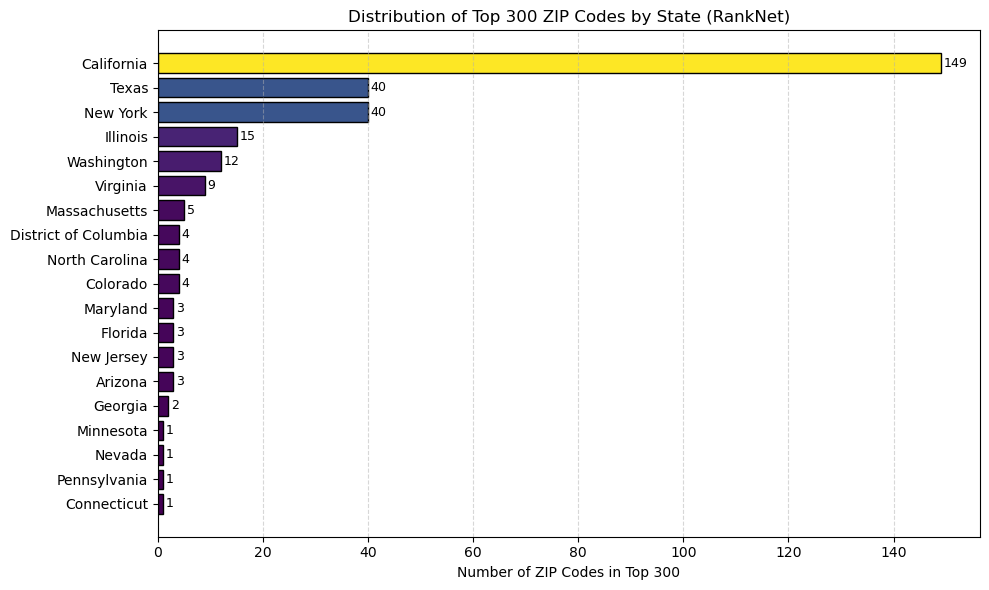

In [199]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Group and sort
state_counts = top300.groupby('State').size().sort_values(ascending=False)

# Normalize counts for color mapping
counts = state_counts.values
norm_counts = (counts - counts.min()) / (counts.max() - counts.min())
colors = cm.viridis(norm_counts)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(state_counts.index, counts, color=colors, edgecolor='black')
plt.gca().invert_yaxis()  # Highest count at top
plt.xlabel('Number of ZIP Codes in Top 300')
plt.title('Distribution of Top 300 ZIP Codes by State (RankNet)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             str(int(width)),
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [138]:
df = df_all.copy()

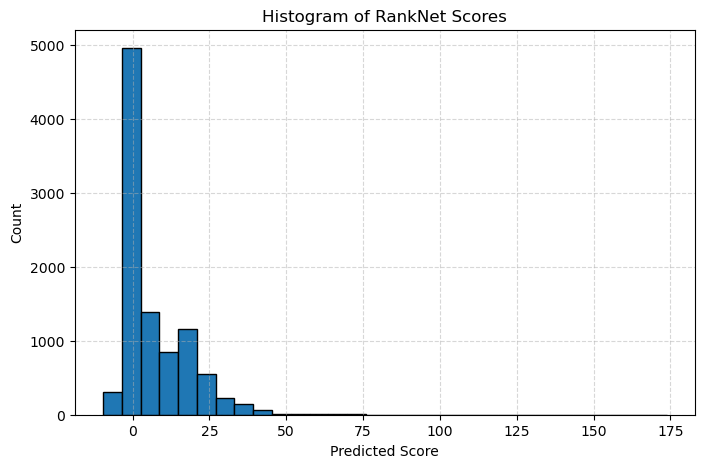

In [154]:
import matplotlib.pyplot as plt
y_pred = df["RankNetScore"].to_numpy()
plt.figure(figsize=(8,5))
plt.hist(y_pred, bins=30, edgecolor='k')
plt.title("Histogram of RankNet Scores")
plt.xlabel("Predicted Score")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


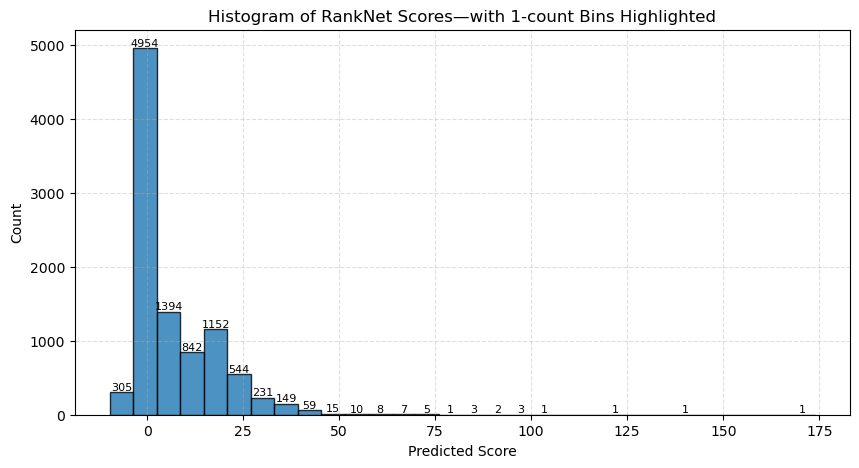

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Prepare your scores (coerce to numeric, drop NaN/inf)
scores = pd.to_numeric(df["RankNetScore"], errors="coerce")
scores = scores.replace([np.inf, -np.inf], np.nan).dropna().values

# 2) Make the histogram and get counts/bins/patches
plt.figure(figsize=(10,5))
counts, bins, patches = plt.hist(
    scores,
    bins=30,
    edgecolor='k',
    alpha=0.8
)

# 3) Highlight bins with exactly one count
for count, patch in zip(counts, patches):
    if count == 1:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('C0')  # default blue

# 4) Annotate every bar with its count
for count, left, right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        plt.text(
            (left + right) / 2,   # x-position: center of the bin
            count + 0.5,          # y-position: just above the bar
            f"{int(count)}",      
            ha='center',
            va='bottom',
            fontsize=8,
            color='black'
        )

# 5) Styling
plt.title("Histogram of RankNet Scores—with 1-count Bins Highlighted")
plt.xlabel("Predicted Score")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [172]:
from itertools import combinations
import numpy as np

def pairwise_accuracy(y_true, y_score):
    correct = total = 0
    for i, j in combinations(range(len(y_true)), 2):
        if y_true[i] == y_true[j]:
            continue
        total += 1
        # same ordering sign ⇒ correct
        if (y_score[i] - y_score[j]) * (y_true[i] - y_true[j]) > 0:
            correct += 1
    return correct / total if total > 0 else np.nan

pw_acc = pairwise_accuracy(df["Cluster_Grouped"].to_numpy(),
                           df["RankNetScore"].to_numpy())
print(f"Pairwise ranking accuracy: {pw_acc:.3f}")


Pairwise ranking accuracy: 0.001


In [174]:
from sklearn.metrics import ndcg_score

# wrap in lists to make 2D
y_true_2d = [df["Cluster_Grouped"].to_numpy()]
y_score_2d = [df["RankNetScore"].to_numpy()]
ndcg100 = ndcg_score(y_true_2d, y_score_2d, k=100)
print(f"NDCG@100: {ndcg100:.3f}")


NDCG@100: 0.500


In [176]:
import numpy as np
from itertools import combinations
from sklearn.metrics import roc_auc_score

# 1) Extract arrays
y_true  = df["Cluster_Grouped"].to_numpy()   # values in {1,2}
y_score = df["RankNetScore"].to_numpy()     # continuous model scores

# 2) Pairwise accuracy: fraction of correctly ordered (1 vs 2) pairs
def pairwise_accuracy(y_true, y_score):
    correct = total = 0
    # iterate over all (i,j) where one is cluster 1 and other is 2
    for i, j in combinations(range(len(y_true)), 2):
        if y_true[i] == y_true[j]:
            continue
        total += 1
        # cluster label difference sign should match score difference sign
        if (y_score[i] - y_score[j]) * (y_true[i] - y_true[j]) > 0:
            correct += 1
    return correct / total if total > 0 else np.nan

pw_acc = pairwise_accuracy(y_true, y_score)
print(f"Pairwise accuracy (1 vs 2): {pw_acc:.3f}")

# 3) ROC AUC: equivalent to the above but via sklearn
#    Must remap labels to 0/1: let’s say cluster 1 → 1, cluster 2 → 0
y_bin = (y_true == 1).astype(int)
auc = roc_auc_score(y_bin, y_score)
print(f"ROC AUC (1=positive):        {auc:.3f}")


Pairwise accuracy (1 vs 2): 0.001
ROC AUC (1=positive):        0.999


In [178]:
from scipy.stats import kendalltau

tau, p = kendalltau(df["Cluster_Grouped"], df["RankNetScore"])
print(f"Kendall’s τ: {tau:.3f} (p={p:.3g})")


Kendall’s τ: -0.618 (p=0)


In [180]:
from scipy.stats import spearmanr

rho, p = spearmanr(df["Cluster_Grouped"], df["RankNetScore"])
print(f"Spearman’s ρ: {rho:.3f} (p={p:.3g})")


Spearman’s ρ: -0.757 (p=0)


In [182]:
import numpy as np
from itertools import combinations
from sklearn.metrics import roc_auc_score

# 1) Extract arrays
y_true_orig = df["Cluster_Grouped"].to_numpy()   # {1 (better), 2 (worse)}
y_score      = df["RankNetScore"].to_numpy()

# 2) Remap to {1 (better), 0 (worse)}
y_true = (y_true_orig == 1).astype(int)

# 3) ROC AUC
auc = roc_auc_score(y_true, y_score)
print(f"ROC AUC (1=better):          {auc:.3f}")

# 4) Pairwise accuracy on original labels
def pairwise_accuracy(y_lbl, y_score):
    correct = total = 0
    for i, j in combinations(range(len(y_lbl)), 2):
        if y_lbl[i] == y_lbl[j]:
            continue
        total += 1
        # want score higher for the better label (y_lbl==1)
        if (y_score[i] - y_score[j]) * (y_lbl[i] - y_lbl[j]) > 0:
            correct += 1
    return correct / total if total>0 else np.nan

pw_acc = pairwise_accuracy(y_true_orig, y_score)
print(f"Pairwise ranking accuracy: {pw_acc:.3f}")


ROC AUC (1=better):          0.999
Pairwise ranking accuracy: 0.001
